The direct colab link to this notebook is [here](https://colab.research.google.com/github/D3Mlab/ppandas/blob/master/examples/pJoin.ipynb).

The datasets used can be found [here](https://github.com/D3Mlab/ppandas/tree/master/tests/testing).

#Install pre-requisites and ppandas

In [0]:
!pip install -i https://test.pypi.org/simple/ PPandas==0.0.1.6.7

Looking in indexes: https://test.pypi.org/simple/
  Found existing installation: PPandas 0.0.1.6.5
    Uninstalling PPandas-0.0.1.6.5:
      Successfully uninstalled PPandas-0.0.1.6.5


In [0]:
!pip install pgmpy==0.1.9
!pip install networkx==2.4
!pip install matplotlib
!pip install python-intervals

In [0]:
from pgmpy.models import BayesianModel
from ppandas.p_frame import PDataFrame
from pgmpy.factors.discrete import TabularCPD
import pandas as pd

#Create test pDataFrames

PDataFrame takes in 2 arguments: list of independent variables and data in the form of pandas dataFrame

In [0]:
df1 = pd.read_csv("ab.csv")
df2 = pd.read_csv("bc.csv")
df3 = pd.read_csv("bc-1.csv")
df4 = pd.read_csv("ab-1.csv")
df5 = pd.read_csv("a-1.csv")

pd1 = PDataFrame(["A"],df1)
pd2 = PDataFrame(["B"],df2)
pd3 = PDataFrame(["B"],df3)
pd4 = PDataFrame(["A"],df4)
pd5 = PDataFrame(["A"],df5)

Visualise function can help users to see their models

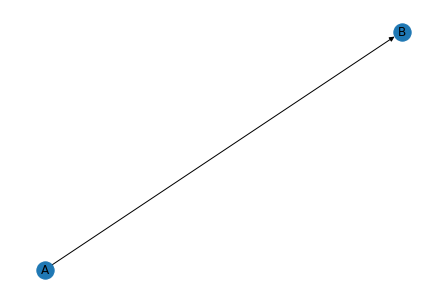

+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| B(0) | 0.3  | 0.7  |
+------+------+------+
| B(1) | 0.7  | 0.3  |
+------+------+------+


In [0]:
pd1.visualise(show_tables=True)

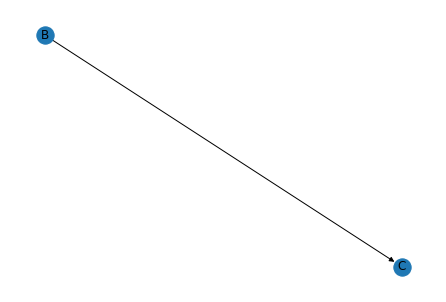

+------+-----+
| B(0) | 0.5 |
+------+-----+
| B(1) | 0.5 |
+------+-----+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| C(0) | 0.4  | 0.5  |
+------+------+------+
| C(1) | 0.6  | 0.5  |
+------+------+------+


In [0]:
pd2.visualise(show_tables=True)

# Using PJoin

Use reference_pdataframe.pjoin(secondary_pdataframe) to join two pDataFrames

## Use pd1 as reference data pDataFrame

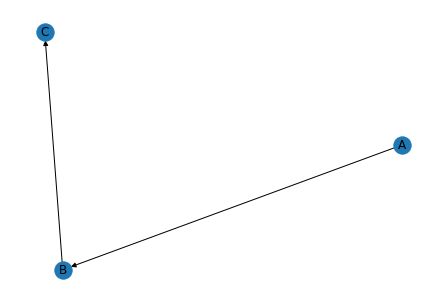

+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| C(0) | 0.4  | 0.5  |
+------+------+------+
| C(1) | 0.6  | 0.5  |
+------+------+------+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| B(0) | 0.3  | 0.7  |
+------+------+------+
| B(1) | 0.7  | 0.3  |
+------+------+------+


In [0]:
#pd1.join(pd2) should be ok

pd_join1 = pd1.pjoin(pd2)
pd_join1.visualise(show_tables=True)

In [0]:
pd_join1.num_of_records

300

pd2.join(pd1) is illegal because pd2 cannot be used as reference in this case

In [0]:
try:
	pd_join2 = pd2.pjoin(pd1)
except ValueError as e:
	print(e)

This join can not be performed since independent variable(s): 'B' in reference distribution are dependent in the second distribution. Please consider dropping these new dependencies or switching reference distribution.


Joining 2 pDataFrame with the same structure :

the child conditional probability is a weighted average of the original two Bayesian Networks.

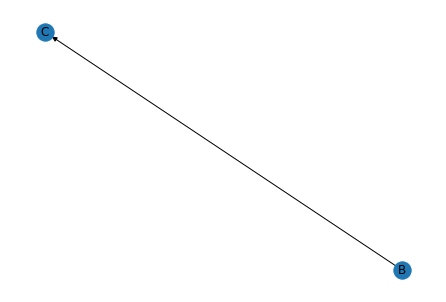

+------+-----+
| B(0) | 0.2 |
+------+-----+
| B(1) | 0.8 |
+------+-----+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| C(0) | 0.5  | 0.5  |
+------+------+------+
| C(1) | 0.5  | 0.5  |
+------+------+------+


In [0]:
pd3.visualise(show_tables=True)

In [0]:
pd3.num_of_records

100

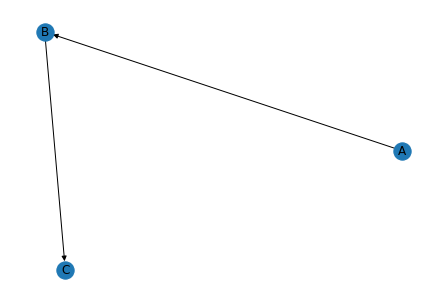

+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+---------------------+------+
| B    | B(0)                | B(1) |
+------+---------------------+------+
| C(0) | 0.42500000000000004 | 0.5  |
+------+---------------------+------+
| C(1) | 0.575               | 0.5  |
+------+---------------------+------+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| B(0) | 0.3  | 0.7  |
+------+------+------+
| B(1) | 0.7  | 0.3  |
+------+------+------+


In [0]:
pd_join3 = pd_join1.pjoin(pd3)
pd_join3.visualise(show_tables=True)

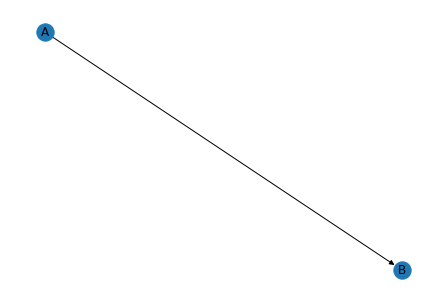

+------+-----+
| A(0) | 0.2 |
+------+-----+
| A(1) | 0.8 |
+------+-----+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| B(0) | 0.5  | 0.5  |
+------+------+------+
| B(1) | 0.5  | 0.5  |
+------+------+------+


In [0]:
pd4.visualise(show_tables=True)

In [0]:
pd4.num_of_records

100

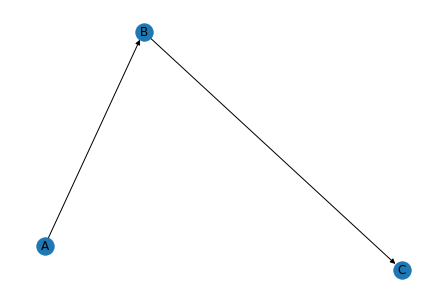

+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| C(0) | 0.4  | 0.5  |
+------+------+------+
| C(1) | 0.6  | 0.5  |
+------+------+------+
+------+--------------------+--------------------+
| A    | A(0)               | A(1)               |
+------+--------------------+--------------------+
| B(0) | 0.35               | 0.6499999999999999 |
+------+--------------------+--------------------+
| B(1) | 0.6499999999999999 | 0.35               |
+------+--------------------+--------------------+


In [0]:
pd_join4 = pd_join1.pjoin(pd4)
pd_join4.visualise(show_tables=True)

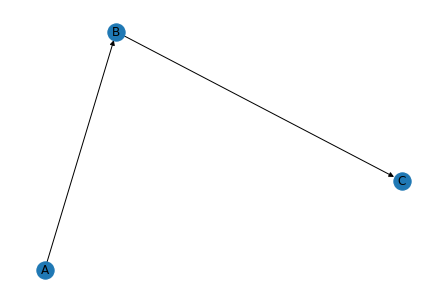

+------+-----+
| A(0) | 0.2 |
+------+-----+
| A(1) | 0.8 |
+------+-----+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| C(0) | 0.4  | 0.5  |
+------+------+------+
| C(1) | 0.6  | 0.5  |
+------+------+------+
+------+--------------------+--------------------+
| A    | A(0)               | A(1)               |
+------+--------------------+--------------------+
| B(0) | 0.35               | 0.6499999999999999 |
+------+--------------------+--------------------+
| B(1) | 0.6499999999999999 | 0.35               |
+------+--------------------+--------------------+


In [0]:
pd_join5 = pd4.pjoin(pd_join1)
pd_join5.visualise(show_tables = True)

# Query

Query function takes in a list of the interested variables and an optional argument of array of evidences

In [0]:
res = pd_join5.query(['A'])
print (res)

     A  Probability(A)
0  0.0             0.2
1  1.0             0.8


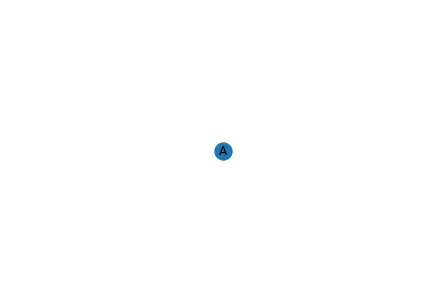

+------+-----+
| A(0) | 0.2 |
+------+-----+
| A(1) | 0.8 |
+------+-----+


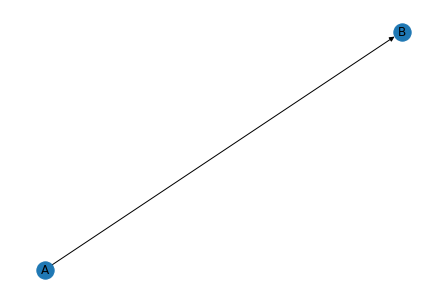

+------+-----+
| A(0) | 0.2 |
+------+-----+
| A(1) | 0.8 |
+------+-----+
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| B(0) | 0.3  | 0.7  |
+------+------+------+
| B(1) | 0.7  | 0.3  |
+------+------+------+
     B  Probability(B)
0  0.0             0.3
1  1.0             0.7
200


In [0]:
#Replace the marginal distribution of an independent variable node
pd5.visualise(show_tables=True)
pd_join_6 = pd5.pjoin(pd1)
pd_join_6.visualise(show_tables=True)
queryResult = pd_join_6.query(["B"],evidence_vars={"A":0})
print(queryResult)
print(pd_join_6.num_of_records)